### Module 3

In [1]:
from pathlib import Path

parent_dir = Path().resolve().parent 
data_path = parent_dir/"data/module3"   
result_path = parent_dir/"results/module3" 
result_path.mkdir(exist_ok=True)

Ex3.1

In [2]:
from a2cw import load_nii

scans, masks = load_nii(data_path)
print(f"Data loaded for {len(scans)} patients.")

Data loaded for 40 patients.



For patient 18:
  Segmentation range (without padding): x=(308, 316), y=(331, 341), z=(96, 97)
  Subvolume shape: (68, 70, 11)
  Metrices: Dice=0.3540, Precision=0.2260, Recall=0.8163

For patient 35:
  Segmentation range (without padding): x=(174, 181), y=(180, 188), z=(156, 160)
  Subvolume shape: (67, 68, 14)
  Metrices: Dice=0.3794, Precision=0.2399, Recall=0.9071

For patient 7:
  Segmentation range (without padding): x=(194, 235), y=(298, 341), z=(50, 62)
  Subvolume shape: (101, 103, 22)
  Metrices: Dice=0.8246, Precision=0.9079, Recall=0.7554

For patient 37:
  Segmentation range (without padding): x=(111, 129), y=(275, 300), z=(367, 389)
  Subvolume shape: (78, 85, 32)
  Metrices: Dice=0.5767, Precision=0.4773, Recall=0.7282

For patient 4:
  Segmentation range (without padding): x=(93, 104), y=(209, 220), z=(81, 89)
  Subvolume shape: (71, 71, 18)
  Metrices: Dice=0.8098, Precision=0.8505, Recall=0.7728

For patient 16:
  Segmentation range (without padding): x=(353, 385), y

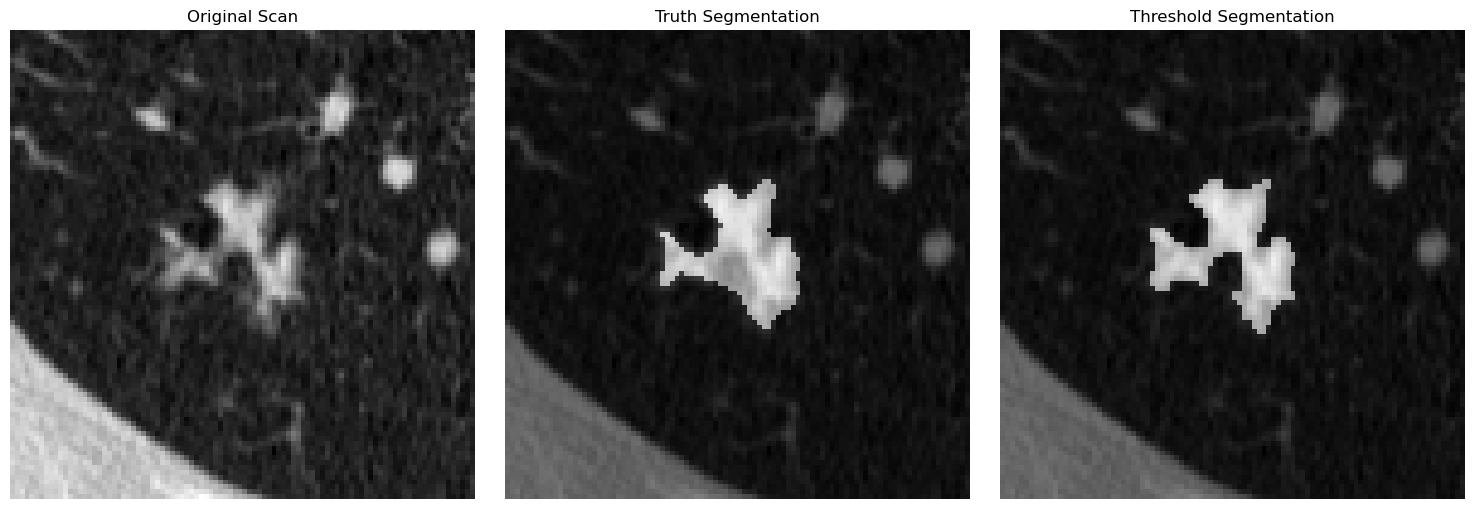


For patient 24:
  Segmentation range (without padding): x=(191, 211), y=(332, 350), z=(67, 71)
  Subvolume shape: (80, 78, 14)
  Metrices: Dice=0.4266, Precision=0.2919, Recall=0.7922

For patient 15:
  Segmentation range (without padding): x=(129, 191), y=(243, 304), z=(85, 94)
  Subvolume shape: (122, 121, 19)
  Metrices: Dice=0.7240, Precision=0.9285, Recall=0.5933

For patient 31:
  Segmentation range (without padding): x=(365, 396), y=(295, 321), z=(168, 178)
  Subvolume shape: (91, 86, 20)
  Metrices: Dice=0.7451, Precision=0.6936, Recall=0.8049

For patient 9:
  Segmentation range (without padding): x=(387, 396), y=(238, 248), z=(108, 112)
  Subvolume shape: (69, 70, 14)
  Metrices: Dice=0.5393, Precision=0.4060, Recall=0.8030

For patient 17:
  Segmentation range (without padding): x=(297, 303), y=(257, 263), z=(113, 114)
  Subvolume shape: (66, 66, 11)
  Metrices: Dice=0.3284, Precision=0.3438, Recall=0.3143

For patient 10:
  Segmentation range (without padding): x=(317, 321

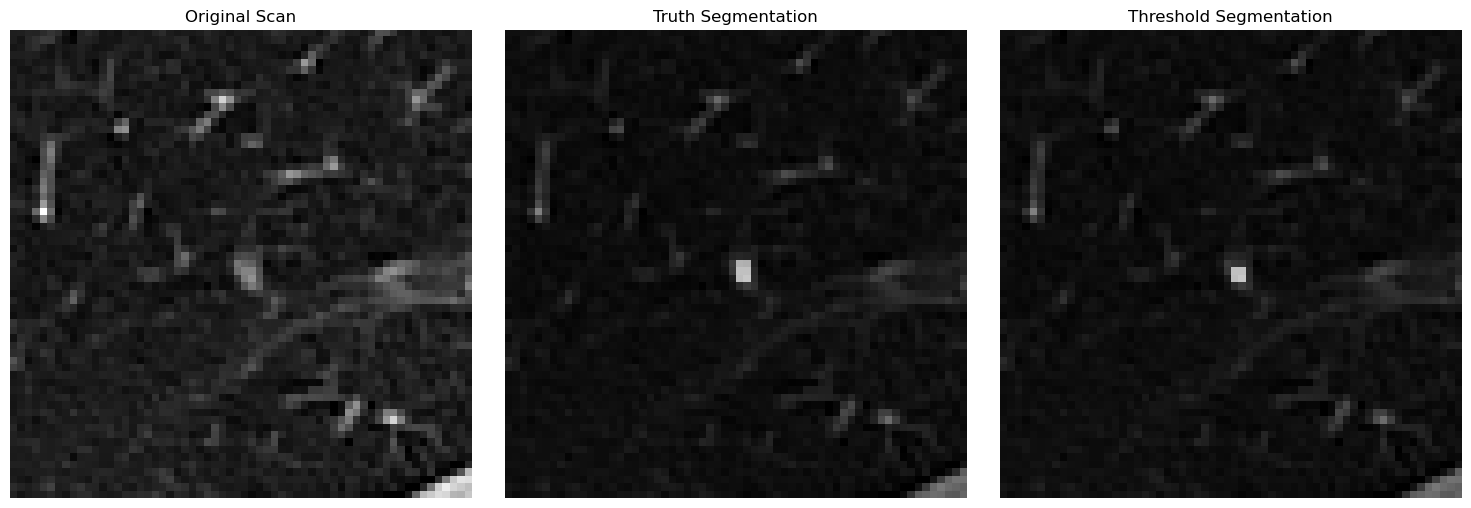


For patient 2:
  Segmentation range (without padding): x=(302, 328), y=(267, 300), z=(172, 200)
  Subvolume shape: (86, 93, 38)
  Metrices: Dice=0.7604, Precision=0.7206, Recall=0.8049

For patient 32:
  Segmentation range (without padding): x=(294, 324), y=(243, 293), z=(345, 377)
  Subvolume shape: (90, 110, 42)
  Metrices: Dice=0.4830, Precision=0.4931, Recall=0.4733

For patient 26:
  Segmentation range (without padding): x=(339, 346), y=(239, 246), z=(87, 89)
  Subvolume shape: (67, 67, 12)
  Metrices: Dice=0.6714, Precision=0.9400, Recall=0.5222

For patient 12:
  Segmentation range (without padding): x=(171, 177), y=(247, 252), z=(185, 188)
  Subvolume shape: (66, 65, 13)
  Metrices: Dice=0.5361, Precision=0.6842, Recall=0.4407

For patient 29:
  Segmentation range (without padding): x=(346, 358), y=(351, 364), z=(51, 55)
  Subvolume shape: (72, 73, 14)
  Metrices: Dice=0.6829, Precision=0.7401, Recall=0.6338

For patient 21:
  Segmentation range (without padding): x=(148, 154)

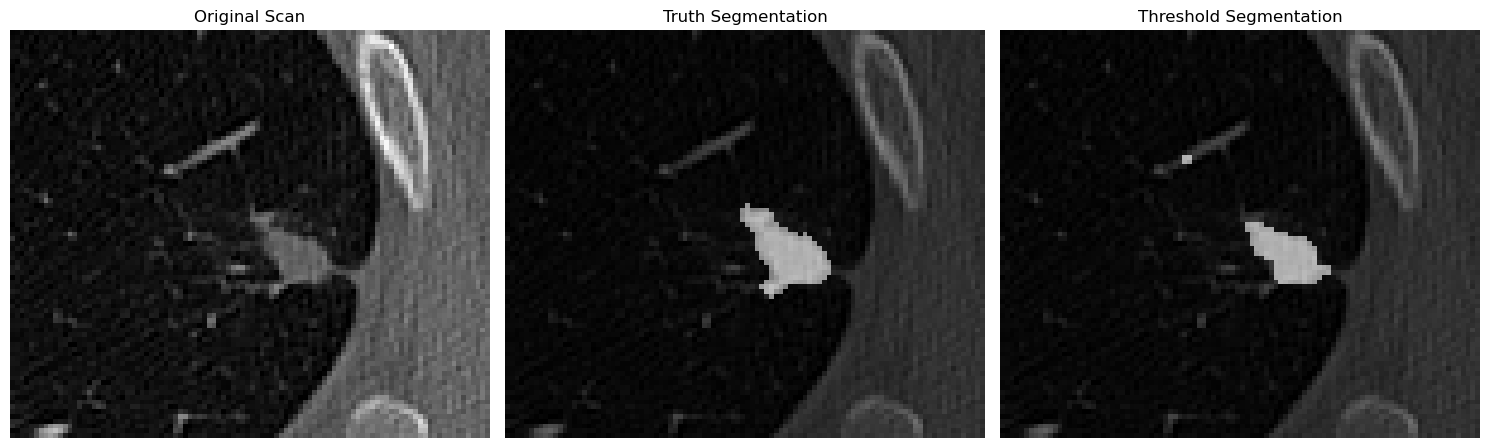


For patient 11:
  Segmentation range (without padding): x=(173, 194), y=(336, 358), z=(61, 66)
  Subvolume shape: (81, 82, 15)
  Metrices: Dice=0.8255, Precision=0.8622, Recall=0.7919

For patient 1:
  Segmentation range (without padding): x=(97, 139), y=(346, 384), z=(98, 108)
  Subvolume shape: (102, 98, 20)
  Metrices: Dice=0.6798, Precision=0.6694, Recall=0.6906

For patient 23:
  Segmentation range (without padding): x=(201, 209), y=(390, 398), z=(46, 48)
  Subvolume shape: (68, 68, 12)
  Metrices: Dice=0.0851, Precision=0.0481, Recall=0.3684

For patient 3:
  Segmentation range (without padding): x=(324, 334), y=(401, 414), z=(52, 55)
  Subvolume shape: (70, 73, 13)
  Metrices: Dice=0.1086, Precision=0.0600, Recall=0.5745

For patient 30:
  Segmentation range (without padding): x=(124, 143), y=(272, 289), z=(91, 94)
  Subvolume shape: (79, 77, 13)
  Metrices: Dice=0.7157, Precision=0.9402, Recall=0.5777

For patient 33:
  Segmentation range (without padding): x=(202, 248), y=(27

In [3]:
import numpy as np
from a2cw import seg_range, subvolume, evaluate, visualise, adapt_thd_segm

results = {}

for id in scans.keys():
    print(f"\nFor patient {id}:")
    
    # find the segmentation range
    s_range = seg_range(masks[id])
    
    print(f"  Segmentation range (without padding): x={s_range['x']}, y={s_range['y']}, z={s_range['z']}")
    
    # create subvolume
    subv = subvolume(scans[id], s_range)
    subv_mask = subvolume(masks[id], s_range)
    
    print(f"  Subvolume shape: {subv.shape}")
    
    scale = 0.31  # adaptive boundary width scale
    boundary = [int(subv.shape[0] * scale), int(subv.shape[1] * scale), int(subv.shape[2] * scale)]
    
    # threshold segmentation comparison
    #segmentation = adapt_thd_segm(subv, mask=None, margin_factor=0.01, boundary=boundary)  # OTSU
    segmentation = adapt_thd_segm(subv, subv_mask, margin_factor=0.01, boundary=boundary) # refined th segmentation

    # evaluate result
    metrics = evaluate(segmentation, subv_mask)
    
    print(f"  Metrices: Dice={metrics['dice']:.4f}, Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}")
    
    results[id] = {
        'subvolume': subv,
        'truth': subv_mask,
        'segmentation': segmentation,
        'metrics': metrics
    }
    
    # visualise a few patients
    if id == '22' or id == '38' or id == '25':
        visualise(subv, subv_mask, segmentation)

# analysis all results
dice_scores = [results[pid]['metrics']['dice'] for pid in results]
mean_dice = np.mean(dice_scores)
std_dice = np.std(dice_scores)

print(f"\nAverage Dice Score: {mean_dice:.4f} ± {std_dice:.4f}")


Ex3.2

In [3]:
from a2cw import load_nii, load_labels

#scans, masks = load_nii(data_path)    # Don't reload if it has been loaded before (will cause MemoryError)
labels = load_labels(data_path)

print(f"Labels loaded for {len(labels)} patients, \nScan data loaded for {len(scans)} patients.")

Labels loaded for 40 patients, 
Scan data loaded for 40 patients.


Intensity range for all patients: [-1024.0, 1733.0]
Using 100 bins to calculate the uniformity.

Extracted 40 patient features, print the first five rows:
         energy         mad  uniformity  label
22  194329843.0  210.896416    0.023843      2
19  325362110.0  204.057321    0.021688      2
0    27673733.0  189.503849    0.018996      2
5    81139875.0  203.623394    0.013140      1
35   41967170.0  247.320254    0.016035      2


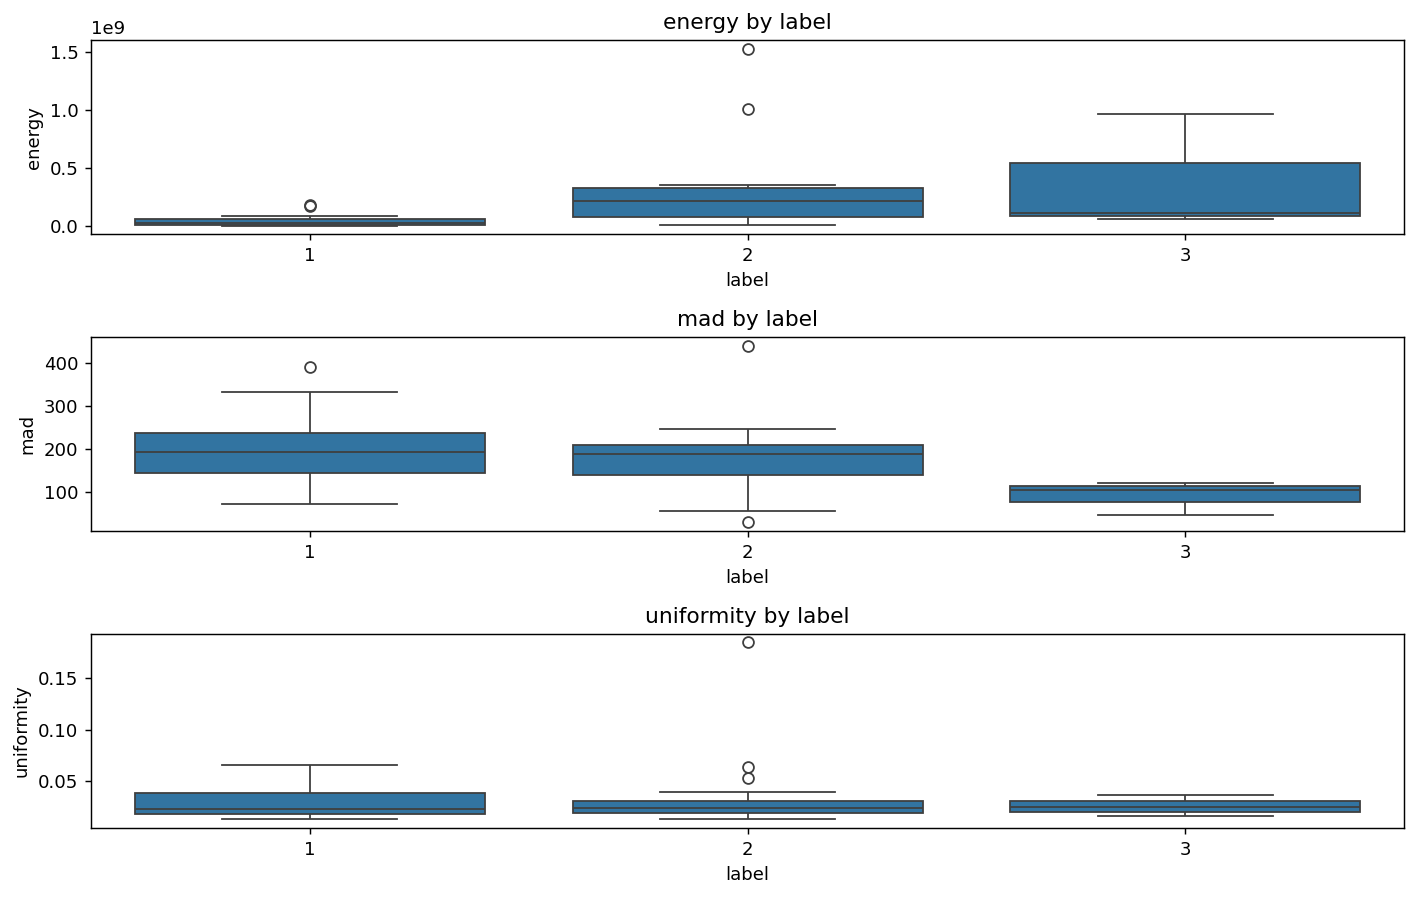

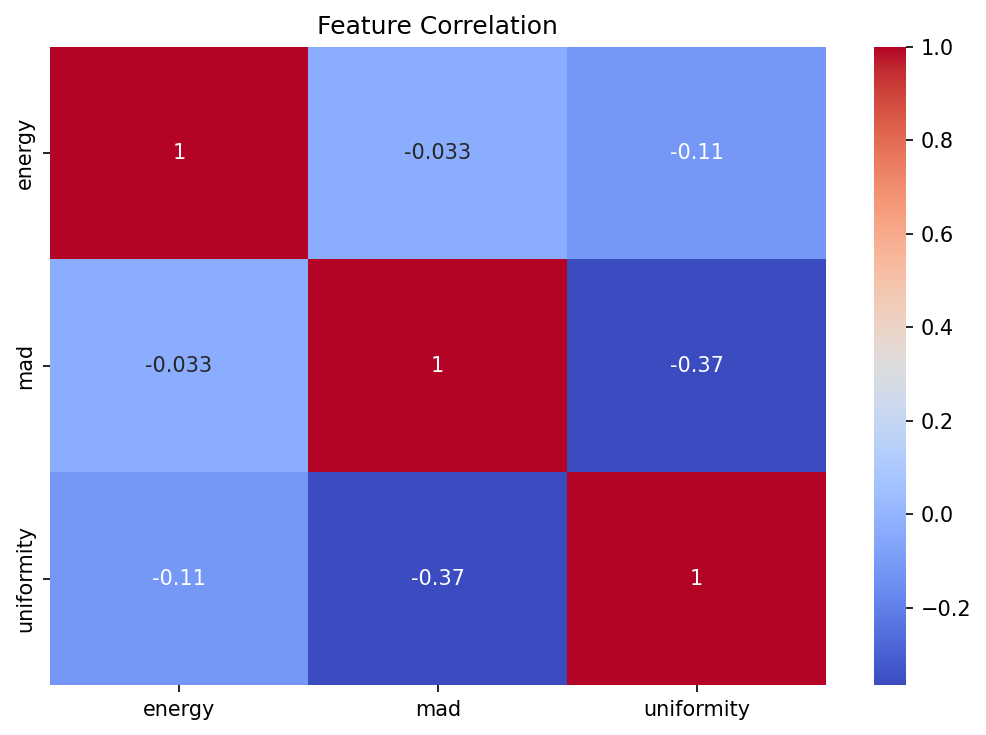

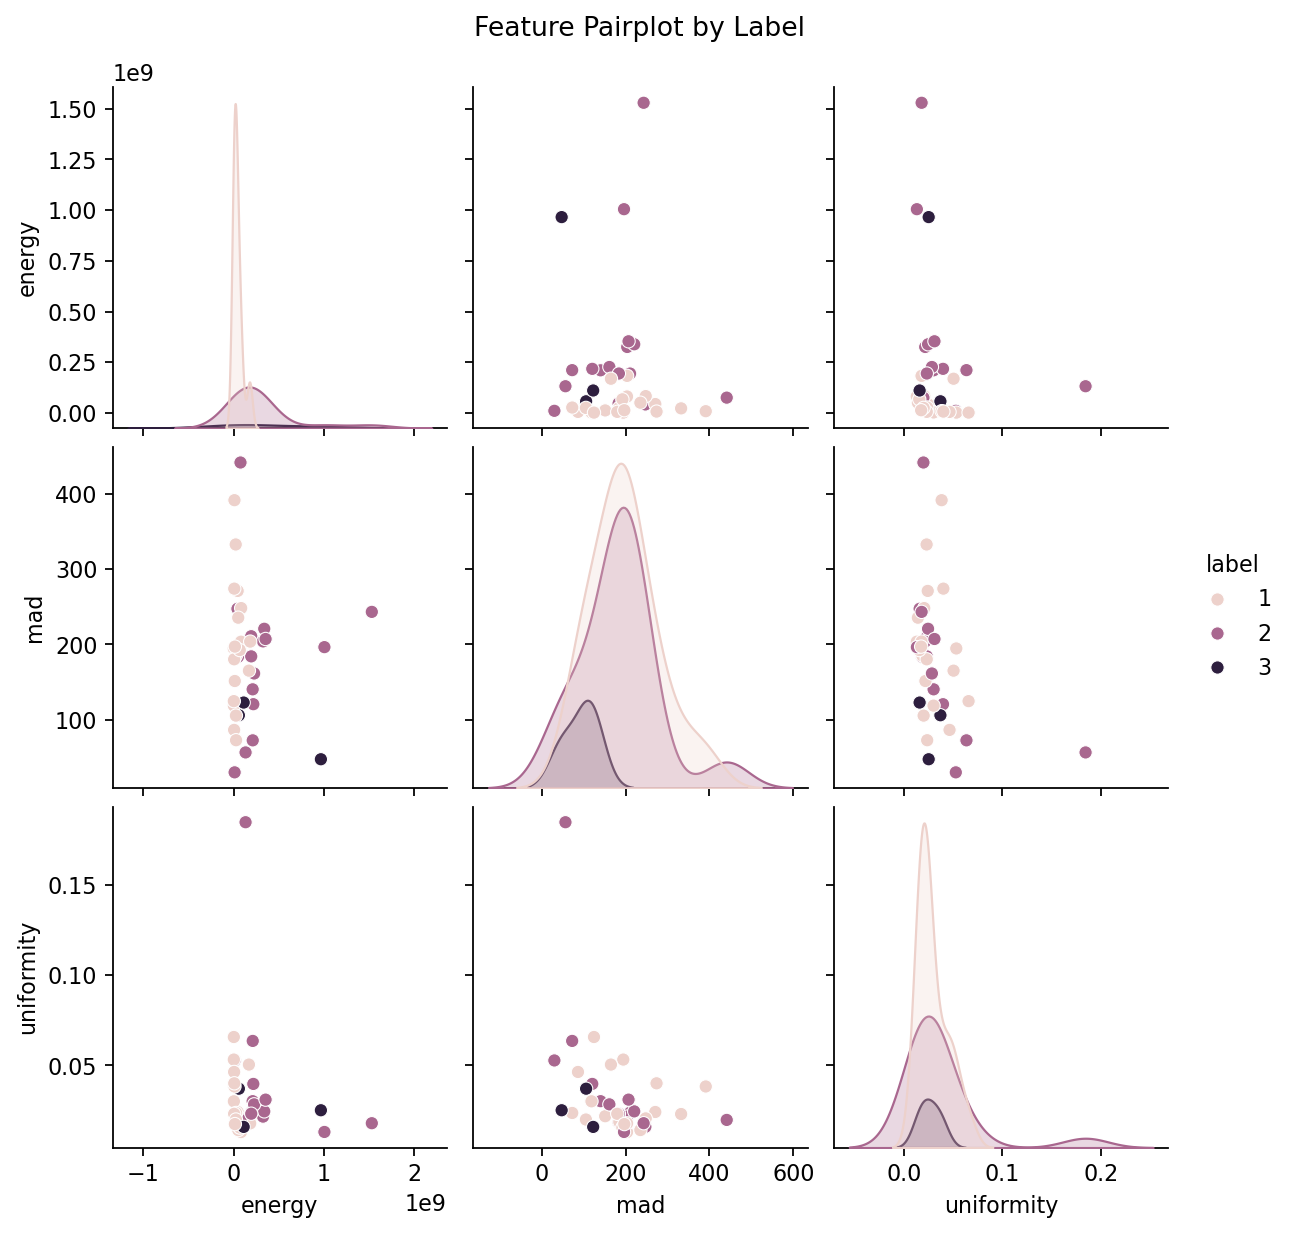

In [4]:
import numpy as np
import pandas as pd

from a2cw import extract_fea , vis_fea

# find the ranges of min-max intensities
mins = []
maxs = []

for id in scans:
    voxels = scans[id][masks[id] > 0]
    if len(voxels) > 0:
        mins.append(np.min(voxels))
        maxs.append(np.max(voxels))

all_min = np.min(mins)
all_max = np.max(maxs)

print(f"Intensity range for all patients: [{all_min}, {all_max}]")


n_bins = 100
print(f"Using {n_bins} bins to calculate the uniformity.")

fea_dict = {}

for id in scans.keys():
    if id in labels.keys():
        features = extract_fea(scans[id], masks[id], n_bins=n_bins)
        
        if features:
            features['label'] = labels[id]
            fea_dict[id] = features
    else:
        print(f"Warning: Patient {id} has no label!")

# convey to DataFrame
fea_df = pd.DataFrame.from_dict(fea_dict, orient='index')

print(f"\nExtracted {len(fea_df)} patient features, print the first five rows:")
print(fea_df.head())

vis_fea(fea_df)


In [ ]:
from a2cw import analyse
import pandas as pd
pd.set_option('display.width', 150)
pd.set_option('display.max_columns', None) 

best_feature = analyse(fea_df).index[0]
print(f"\nBased on statistical significance, {best_feature} \
may be the best feature to classify between the benign and malignant lesions.")

t-test:
            t_statistic   p_value   mean_benign  mean_malignant    std_benign  std_malignant
energy        -3.052541  0.006369  4.174371e+07    3.137498e+08  5.127233e+07   3.850141e+08
mad            1.005067  0.321331  1.967732e+02    1.693786e+02  7.829315e+01   8.936224e+01
uniformity    -0.712795  0.482593  2.894423e-02    3.535466e-02  1.455553e-02   3.639880e-02

Based on statistical significance, energy may be the best feature to classify between the benign and malignant lesions.
